In [1]:
#下面这行代码，是为了把自己编写的代码文件当作一共模块导入，这里是把Utilities文件夹中的plotting.py文件当作python的模块导入，对应的是下面的from plotting import newfig, savefig。路径要随着不同设备的系统做相应的修改
import sys #导入sys模块。sys模块提供了一些变量和函数，用于与 Python解释器进行交互和访问。例如，sys.path 是一个 Python 在导入模块时会查找的路径列表，sys.argv 是一个包含命令行参数的列表，sys.exit() 函数可以用于退出 Python 程序。导入 sys 模块后，你就可以在你的程序中使用这些变量和函数了。
# sys.path.insert(0, '../../../Utilities/') #在 Python的sys.path列表中插入一个新的路径。sys.path是一个 Python 在导入模块时会查找的路径列表。新的路径'../../Utilities/'相对于当前脚本的路径。当你尝试导入一个模块时，Python 会在 sys.path 列表中的路径下查找这个模块。通过在列表开始位置插入一个路径，你可以让 Python 优先在这个路径下查找模块。这在你需要导入自定义模块或者不在 Python 标准库中的模块时非常有用。

import torch
#collections是python一个内置模块，提供了一些有用的数据结构
from collections import OrderedDict  #这个类是字典dict的一个子类，用于创建有序的字典。普通字典中元素顺序是无序的，在OrderedDict中元素的顺序是有序的，元素的顺序是按照它们被添加到字典中的顺序决定的。

from pyDOE import lhs #`pyDOE`是一个Python库，用于设计实验。它提供了一些函数来生成各种设计，如因子设计、拉丁超立方设计等。`lhs`是库中的一个函数，全名为"Latin Hypercube Sampling"，拉丁超立方采样。这是一种统计方法，用于生成一个近似均匀分布的多维样本点集。它在参数空间中生成一个非常均匀的样本，这对于高维数值优化问题非常有用，因为它可以更好地覆盖参数空间。
import numpy as np
import matplotlib.pyplot as plt
import scipy.io #导入了scipy库中的io模块。scipy.io模块包含了一些用于文件输入/输出的函数，例如读取和写入.mat文件（MATLAB格式）
from scipy.interpolate import griddata #`scipy.interpolate`是`scipy`库中的一个模块，提供了许多插值工具，用于在给定的离散数据点之间进行插值和拟合。`griddata`是这个模块中的一个函数，用于在无规则的数据点上进行插值。

import random

import skopt #用于优化问题的库，特别是机器学习中的超参数优化
from distutils.version import LooseVersion #distutils是Python的一个标准库，用于构建和安装Python包。LooseVersion是一个类，用于比较版本号


# from plotting_torch import newfig, savefig #从自定义的plotting_torch.py文件中导入了newfig和savefig函数。这两个函数用于创建和保存图形。这两个函数的定义在plotting_torch.py文件中

from mpl_toolkits.axes_grid1 import make_axes_locatable #`mpl_toolkits.axes_grid1`是`matplotlib`库的一个模块，提供了一些高级的工具来控制matplotlib图形中的坐标轴和颜色条。`make_axes_locatable`是模块中的一个函数，用于创建一个可分割的坐标轴。可以在这个坐标轴的四个方向（上、下、左、右）添加新的坐标轴或颜色条。
import matplotlib.gridspec as gridspec #是`matplotlib`库的一个模块，用于创建一个网格布局来放置子图。在`matplotlib`中可以创建一个或多个子图（subplot），每个子图都有自己的坐标轴，并可以在其中绘制图形。`gridspec`模块提供了一个灵活的方式来创建和放置子图。
import time #一个内置模块，用于处理时间相关的操作。


from tqdm import tqdm #一个快速，可扩展的python进度条库，可以在python长循环中添加一个进度提示信息，用户只需要封装任意的迭代器tqdm(iterator)。

import seaborn as sns  # 导入seaborn库用于绘制密度图

from sklearn.cluster import KMeans #sklearn是一个广泛使用的机器学习库，提供了各种算法和工具用于数据挖掘和分析。Kmeans是聚类算法，用于将数据分成预先指定数量的簇
import faiss #一种高效的相似性搜索和密集向量聚类库，适用于在大规模数据中进行高维向量的搜索和聚类操作
#faiss的安装方法：conda install -c conda-forge faiss-gpu
import matplotlib.cm as cm

In [2]:
import re
import pandas as pd

# 示例数据
methods_data = {
    'PINN': """
    [0.0004956057615485381, 0.0004579731242784802, 0.00048500132663694876, 0.0005013752234597279, 0.000359763567058975, 0.000488935438107126, 0.0004843198676971831, 0.0004834466334679868, 0.00040752040032805475, 0.000329217667113283]
    Error u of fuhe active learning(LHS sampling): 4.493159e-04
    [0.0001556188776942094, 0.00014083595674714471, 0.00015119723295320208, 0.00015578981583199116, 0.00011274146033384123, 0.00015136867516717852, 0.00014879528444615252, 0.0001482276112410039, 0.00012684287253309707, 0.00012114693382867865]
    MAE of fuhe active learning(LHS sampling): 1.412565e-04
    [5.101697235011853e-08, 4.348852405488779e-08, 4.878619249536311e-08, 5.202059128450065e-08, 2.7730031782506266e-08, 4.9404602784767764e-08, 4.844595277307526e-08, 4.830659212921258e-08, 3.517487657923623e-08, 2.9358704987389298e-08]
    MSE of fuhe active learning(LHS sampling): 4.337330e-08
    [0.00013735474, 0.00064162695, 7.9554666e-05, 1.318947e-05, 0.0009741338, 8.410061e-05, 8.144518e-05, 0.00016590663, 0.00016908921, 0.008741474]
    Chaos of fuhe active learning(LHS sampling): 1.108788e-03
    [5.651432e-07, 4.4195463e-07, 5.2313874e-07, 4.1960902e-07, 4.7219282e-07, 4.4841e-07, 4.1501494e-07, 4.4978174e-07, 4.547312e-07, 4.8475704e-07]
    Residual of fuhe active learning(LHS sampling): 4.674733e-07
    """,
    'Xianxing': """
    [0.0005777216722529544, 0.000601168747836685, 0.0004191025250460875, 0.00047749970608882883, 0.0005747359301415396, 0.0004871583739857238, 0.000484181800419626, 0.00035009269650834957, 0.0004841273821703033, 0.0004902012022933718]
    Error u of fuhe active learning(LHS sampling): 4.945990e-04
    [0.00018203339369724525, 0.0001887308801706836, 0.0001294483871988759, 0.00014785766181922005, 0.0001803519464877156, 0.00015053008654193788, 0.00014885839191090434, 0.00011783194554169929, 0.00014850275583829566, 0.00015238103674508537]
    MAE of fuhe active learning(LHS sampling): 1.546526e-04
    [6.951445393103938e-08, 7.65147550660979e-08, 3.680950334941389e-08, 4.722789931292174e-08, 7.012470903520915e-08, 4.903224600466367e-08, 4.842871886035718e-08, 2.8823780443985435e-08, 4.840900233928711e-08, 4.9757406919213115e-08]
    MSE of fuhe active learning(LHS sampling): 5.246425e-08
    [0.00012425659, 0.01153999, 7.651775e-05, 1.659323e-07, 0.0015517637, 8.986531e-05, 9.110074e-05, 0.0001310487, 0.00017354258, 0.0054417714]
    Chaos of fuhe active learning(LHS sampling): 1.922002e-03
    [4.6403284e-07, 5.417396e-07, 5.317038e-07, 5.351043e-07, 5.5582655e-07, 4.399592e-07, 5.13048e-07, 4.7351818e-07, 4.160429e-07, 4.7344133e-07]
    Residual of fuhe active learning(LHS sampling): 4.944417e-07
    """,
    'Active': """
    [0.0004869522925964482, 0.0005235095448883747, 0.0005237554476565662, 0.0007213907708763572, 0.0004632424338827848, 0.0004572359093830562, 0.00047844022434808303, 0.0037249077611387297, 0.0004352539259992947, 0.0005582657112527746]
    Error u of fuhe active learning(LHS sampling): 8.372954e-04
    [0.00015059136399413816, 0.00016961845370189305, 0.00016639951188100274, 0.00019797398339555837, 0.00014198921942104587, 0.00014009269478925768, 0.00014606141028036416, 0.0010633309723582078, 0.000133545496807984, 0.00017946315576713488]
    MAE of fuhe active learning(LHS sampling): 2.489066e-04
    [4.895678305235026e-08, 5.7491042461433905e-08, 5.725460612086075e-08, 1.0751727658411866e-07, 4.484257342471242e-08, 4.3299124492149306e-08, 4.733799579303161e-08, 2.8523884792675936e-06, 3.979318704310402e-08, 6.509807076999416e-08]
    MSE of fuhe active learning(LHS sampling): 3.363979e-07
    [0.000180726, 0.02108422, 0.00013363994, 4.740355e-06, 0.00014331896, 7.591484e-05, 8.7834065e-05, 7.497391e-05, 0.00085955294, 0.0001263919]
    Chaos of fuhe active learning(LHS sampling): 2.277131e-03
    [4.1476824e-07, 5.266272e-07, 4.143892e-07, 4.8271e-07, 4.8065976e-07, 4.0518535e-07, 4.3354135e-07, 4.9199593e-07, 4.4939793e-07, 5.5529654e-07]
    Residual of fuhe active learning(LHS sampling): 4.654572e-07
    """,
    'Residual': """
    [0.00045805145611875394, 0.0004771065181873362, 0.00047031399385864635, 0.0004631606447110301, 0.000658294319849964, 0.00044474706676665265, 0.0004958982485110908, 0.00043797648214402183, 0.0004494585566836513, 0.001186226629016189]
    Error u of fuhe active learning(LHS sampling): 5.541234e-04
    [0.00013926395308705276, 0.0001439838853540249, 0.00014188826882032926, 0.00014000459250363133, 0.00019906540959503332, 0.0001364767423902824, 0.00014740487777557232, 0.00013542316362562265, 0.00013388584252493332, 0.00034479199263588077]
    MAE of fuhe active learning(LHS sampling): 1.662189e-04
    [4.385757251567006e-08, 4.784238202095417e-08, 4.597585823719485e-08, 4.477365587592991e-08, 8.977124108738106e-08, 4.1626542226958626e-08, 5.085996504591774e-08, 4.0895304419223685e-08, 4.195729080444213e-08, 2.913110993830408e-07]
    MSE of fuhe active learning(LHS sampling): 7.388709e-08
    [0.0058336137, 0.0027746698, 9.98266e-05, 0.0001003621, 0.0017182777, 0.00015788143, 8.476268e-05, 0.0023899209, 0.000114858114, 0.00026434223]
    Chaos of fuhe active learning(LHS sampling): 1.353852e-03
    [4.716262e-07, 4.3378418e-07, 4.505746e-07, 5.09114e-07, 4.6128366e-07, 4.0532063e-07, 5.0193125e-07, 4.9186156e-07, 4.9228083e-07, 4.844103e-07]
    Residual of fuhe active learning(LHS sampling): 4.702187e-07
    """,
    'Fuhe': """
    [0.0004542763125583207, 0.0005714793564971212, 0.00045363030841409266, 0.00045314925368238203, 0.00045580345297568925, 0.0004534996254064436, 0.0004929362151109019, 0.000450675843879352, 0.000391028845622692, 0.0005660049448404751]
    Error u of fuhe active learning(LHS sampling): 4.742484e-04
    [0.00015755675767680765, 0.00017399647019489126, 0.00013757684364718272, 0.00013765544348858937, 0.00013753929617792683, 0.0001385643871430887, 0.00014838351861423435, 0.00013586145569360316, 0.00013146070241801751, 0.0001722410626971086]
    MAE of fuhe active learning(LHS sampling): 1.470836e-04
    [5.3883428318644806e-08, 6.734517340921904e-08, 4.317636516147695e-08, 4.299177601457567e-08, 4.3508656291202495e-08, 4.336188111046271e-08, 5.040965159296744e-08, 4.237785550313632e-08, 3.545752530072332e-08, 6.668360258424186e-08]
    MSE of fuhe active learning(LHS sampling): 4.891959e-08
    [0.004542855, 0.00029954524, 9.89338e-05, 4.0011266e-05, 0.0016496709, 0.00013680782, 9.149618e-05, 0.0031120218, 0.00011603964, 0.0002374076]
    Chaos of fuhe active learning(LHS sampling): 1.032479e-03
    [4.963631e-07, 4.7350835e-07, 4.1841577e-07, 4.8710035e-07, 4.498263e-07, 4.360445e-07, 4.5916295e-07, 4.5564673e-07, 4.655392e-07, 4.480089e-07]
    Residual of fuhe active learning(LHS sampling): 4.589616e-07
    """,
    'Chaos': """
    [0.0004674412883165391, 0.0004628815600926884, 0.001988953571379986, 0.001536790641660174, 0.0004627630749660385, 0.0004786288757013898, 0.0004764781606502403, 0.0003541900600579737, 0.00047008263418964365, 0.0004574577561730954]
    Error u of fuhe active learning(LHS sampling): 7.155668e-04
    [0.00014899312484776636, 0.00014347834513784294, 0.0005880355638297599, 0.0004582687785038547, 0.0001406105608273498, 0.00014580893546499232, 0.00014587979548042935, 0.00012408559756693234, 0.00014415591906601584, 0.00013975147146752954]
    MAE of fuhe active learning(LHS sampling): 2.179068e-04
    [4.577808533735908e-08, 4.503283984149388e-08, 8.213674385976531e-07, 4.915438185862943e-07, 4.454001448080849e-08, 4.728529577618739e-08, 4.6900266066365185e-08, 3.073475970090461e-08, 4.605001470793889e-08, 4.372333581267078e-08]
    MSE of fuhe active learning(LHS sampling): 1.662956e-07
    [0.013519786, 0.00017004219, 8.3214356e-05, 3.4635603e-05, 0.0008553475, 0.0001064624, 9.645835e-05, 0.002302335, 0.001264739, 0.028905556]
    Chaos of fuhe active learning(LHS sampling): 4.733858e-03
    [4.8245056e-07, 5.453953e-07, 5.131926e-07, 4.2462227e-07, 4.8445827e-07, 5.311326e-07, 4.995652e-07, 5.516474e-07, 4.7377125e-07, 4.9925893e-07]
    Residual of fuhe active learning(LHS sampling): 5.005494e-07
    """,
    '0.9Residual': """
    [0.00044215659750926724, 0.000447926289821005, 0.00046528507856529534, 0.000449493260910419, 0.00045416803932472264, 0.000451025147539632, 0.000464304224309209, 0.00035500361825755583, 0.0004551666946064595, 0.0004347919163232602]
    Error u of fuhe active learning(LHS sampling): 4.419321e-04
    [0.0001354897882467913, 0.0001370787663337444, 0.0001407130521765692, 0.00013691932434436213, 0.0001372770821028512, 0.00013788236129096907, 0.00014017916027205522, 0.00014833643785631536, 0.00013649811567977309, 0.00013381636038874874]
    MAE of fuhe active learning(LHS sampling): 1.384190e-04
    [4.1017535491147916e-08, 4.2834157310979e-08, 4.506602001435658e-08, 4.228711417329605e-08, 4.2994931940511745e-08, 4.263690205754842e-08, 4.529020330567326e-08, 4.40275683575135e-08, 4.310545957886228e-08, 4.008897212046249e-08]
    MSE of fuhe active learning(LHS sampling): 4.293489e-08
    [0.00091737433, 0.0033293315, 8.174986e-05, 0.00011515436, 0.013141364, 0.0001325212, 8.9137306e-05, 0.0031633228, 0.00011795256, 0.00027504406]
    Chaos of fuhe active learning(LHS sampling): 2.136295e-03
    [4.545284e-07, 4.900289e-07, 4.9603216e-07, 4.9779806e-07, 4.7580443e-07, 4.2070178e-07, 4.413498e-07, 4.7953745e-07, 4.4133049e-07, 4.2756392e-07]
    Residual of fuhe active learning(LHS sampling): 4.624675e-07
    """,
    '0.8Residual': """
    [0.0004707293549947505, 0.0004612123921011905, 0.0004582806912938137, 0.0008995635280795505, 0.0004678607746509371, 0.0004543376477558639, 0.0004783188194771419, 0.0004202985721454659, 0.00046503137086533467, 0.0004550753970373763]
    Error u of fuhe active learning(LHS sampling): 5.030709e-04
    [0.0001435012214855085, 0.00013947610038062897, 0.00013889709446600394, 0.00027129080410677535, 0.00014020493295734056, 0.00013875486294122197, 0.00014394672209775048, 0.00013185882500166922, 0.0001389757313332989, 0.00013846781999010362]
    MAE of fuhe active learning(LHS sampling): 1.525374e-04
    [4.627825282243778e-08, 4.397728090726408e-08, 4.390865860480382e-08, 1.6984077850075236e-07, 4.53247024856124e-08, 4.3349556322945114e-08, 4.7459304771523036e-08, 3.8560148208187176e-08, 4.4829739790498565e-08, 4.3276113899296617e-08]
    MSE of fuhe active learning(LHS sampling): 5.668045e-08
    [0.0011568733, 0.0001842551, 9.7672695e-05, 4.8847127e-05, 0.0051551494, 0.00015519257, 8.013876e-05, 0.0037924857, 0.0001170687, 0.00029051898]
    Chaos of fuhe active learning(LHS sampling): 1.107820e-03
    [4.2971783e-07, 5.3048336e-07, 5.233967e-07, 4.3499813e-07, 5.197752e-07, 4.1548378e-07, 5.1361735e-07, 4.0881105e-07, 4.7455e-07, 4.7004437e-07]
    Residual of fuhe active learning(LHS sampling): 4.720878e-07
    """,
    '0.7Residual': """
    [0.0004570083087470149, 0.0004543861538583277, 0.0007743219387928821, 0.00046752447238432434, 0.0004616614086616885, 0.0004553735258756706, 0.0004944797589628941, 0.00044817434950546637, 0.00045771638633157073, 0.00045252361755346624]
    Error u of fuhe active learning(LHS sampling): 4.923170e-04
    [0.00013925701008905142, 0.00013679358651924782, 0.000233818969348799, 0.0001412323839855714, 0.00013918339199893838, 0.00013850250719788564, 0.00014778875504401718, 0.00013407386322111768, 0.00013902960099696423, 0.0001380793346681271]
    MAE of fuhe active learning(LHS sampling): 1.487759e-04
    [4.362684170534567e-08, 4.330174409866197e-08, 1.2550480709559344e-07, 4.545154873177081e-08, 4.4411627582287854e-08, 4.3526755381368254e-08, 5.0947261536599495e-08, 4.226464663281596e-08, 4.3789813651862786e-08, 4.287087150834626e-08]
    MSE of fuhe active learning(LHS sampling): 5.256959e-08
    [0.0023820307, 0.00023904172, 9.181379e-05, 0.00011417376, 0.0052456115, 0.00013461329, 8.307726e-05, 0.0033238116, 0.00011206184, 0.00025385202]
    Chaos of fuhe active learning(LHS sampling): 1.198009e-03
    [4.859023e-07, 5.654895e-07, 4.253161e-07, 4.2324518e-07, 4.7118897e-07, 3.7065524e-07, 4.8500374e-07, 4.466226e-07, 4.8830566e-07, 4.0876034e-07]
    Residual of fuhe active learning(LHS sampling): 4.570490e-07
    """,
    '0.6Residual': """
    [0.0011543616208620228, 0.00045707295749434026, 0.00046362624988024434, 0.0004529206834760349, 0.00046213150659679133, 0.0004531333749654238, 0.00046329125328891323, 0.0004549379091603087, 0.0004567877551528502, 0.0004580832132626359]
    Error u of fuhe active learning(LHS sampling): 5.276347e-04
    [0.0003426160394842231, 0.0001388639279466249, 0.00014019936662729735, 0.00013866761937634373, 0.00013907676217667764, 0.00013851395289386317, 0.00014008833690033192, 0.00013682917854481667, 0.00013889833981912063, 0.0001394201548512947]
    MAE of fuhe active learning(LHS sampling): 1.593174e-04
    [2.7866545260557383e-07, 4.3344512661027264e-08, 4.487383262568852e-08, 4.298387629680329e-08, 4.428097114440887e-08, 4.33835408608543e-08, 4.52891113298955e-08, 4.358353791162742e-08, 4.341757696864085e-08, 4.386847030044033e-08]
    MSE of fuhe active learning(LHS sampling): 6.736909e-08
    [0.0020461613, 0.000310166, 9.7212105e-05, 0.0006498436, 0.0023169774, 0.00013407611, 8.825571e-05, 0.0022123894, 0.000110255285, 0.00026617912]
    Chaos of fuhe active learning(LHS sampling): 8.231516e-04
    [5.5919645e-07, 4.8913324e-07, 4.3727562e-07, 3.9986048e-07, 4.2176077e-07, 4.466267e-07, 4.4323087e-07, 5.137681e-07, 5.5110786e-07, 4.068238e-07]
    Residual of fuhe active learning(LHS sampling): 4.668784e-07
    """,
    '0.4Residual': """
    [0.0004445093445593267, 0.00042399034907481074, 0.00045070985990068666, 0.0004563691889197438, 0.00045915867372205914, 0.0004569102802660864, 0.00043989177618301454, 0.00046767553380799105, 0.0003713925141930031, 0.0004553728469278672]
    Error u of fuhe active learning(LHS sampling): 4.425980e-04
    [0.00013575470160942217, 0.00012895085643116987, 0.00013715775093764022, 0.0001378792884702504, 0.0001383384991828796, 0.00013931556047875547, 0.0001355400558175344, 0.00014030898254107697, 0.00012966262474591394, 0.00013821917785505707]
    MAE of fuhe active learning(LHS sampling): 1.361127e-04
    [4.1456188938275824e-08, 3.797912115907813e-08, 4.2581956923597985e-08, 4.3517094039552715e-08, 4.405694906378356e-08, 4.387187156269296e-08, 4.109105024218086e-08, 4.546028324721921e-08, 3.3917152687762365e-08, 4.342314949603751e-08]
    MSE of fuhe active learning(LHS sampling): 4.173548e-08
    [0.0028605945, 0.0011564485, 9.7529715e-05, 6.84368e-05, 0.0005067283, 0.00012237826, 7.5987205e-05, 0.0019915146, 0.00010448123, 0.0002533439]
    Chaos of fuhe active learning(LHS sampling): 7.237443e-04
    [4.431838e-07, 4.933738e-07, 4.3018576e-07, 4.910635e-07, 5.032391e-07, 4.7403978e-07, 3.7935274e-07, 4.067541e-07, 4.1392082e-07, 3.9849556e-07]
    Residual of fuhe active learning(LHS sampling): 4.433609e-07
    """,
    '0.3Residual': """
    [0.0012505147640841225, 0.0004452378744504575, 0.0004507800485505064, 0.0004580012875201585, 0.0004537811445903984, 0.0003338246234218845, 0.0008067181846832372, 0.00044614789066263884, 0.00045045700429764826, 0.00044916905103364283]
    Error u of fuhe active learning(LHS sampling): 5.544632e-04
    [0.00036828042543044556, 0.0001350661966960729, 0.00013723799453580255, 0.00013882994760968572, 0.00013703707255176723, 0.00012526679271335735, 0.00024337064109252547, 0.0001340708176454086, 0.00013506376633813321, 0.00013722610411971071]
    MAE of fuhe active learning(LHS sampling): 1.691450e-04
    [3.266822011249241e-07, 4.1394330514605906e-08, 4.264213317663357e-08, 4.3885881914239657e-08, 4.3187140476658507e-08, 3.083792526455692e-08, 1.3692428012356895e-07, 4.165080852395979e-08, 4.2343767717278234e-08, 4.239179568952979e-08]
    MSE of fuhe active learning(LHS sampling): 7.919403e-08
    [0.0002767212, 0.00021303068, 8.804219e-05, 7.94768e-05, 0.0012219904, 0.000121898345, 7.7238845e-05, 0.0019068283, 0.00019625785, 0.00028133485]
    Chaos of fuhe active learning(LHS sampling): 4.462819e-04
    [4.9799155e-07, 4.1886528e-07, 4.4559056e-07, 5.060517e-07, 4.425383e-07, 4.6095056e-07, 5.1775487e-07, 4.7562935e-07, 4.5693855e-07, 4.6749847e-07]
    Residual of fuhe active learning(LHS sampling): 4.689809e-07
    """,
    '0.2Residual': """
    [0.00045985575246004697, 0.00045183070259275737, 0.0004581942996421303, 0.0004642977191147443, 0.0006328674442085219, 0.00045126168160914597, 0.00031100048751964816, 0.00044381452227514094, 0.0004504897445787259, 0.0004541911960506024]
    Error u of fuhe active learning(LHS sampling): 4.577804e-04
    [0.0001385423283982349, 0.00013786928111194125, 0.0001390734437802674, 0.00014069755538471718, 0.00019126439973077102, 0.00013815127379120015, 0.0001345059011230102, 0.00013326390097652814, 0.00013463012057902837, 0.00013793102261453513]
    MAE of fuhe active learning(LHS sampling): 1.425929e-04
    [4.42237515783991e-08, 4.2854966967884575e-08, 4.3863822766200995e-08, 4.4989290063200066e-08, 8.334000557632947e-08, 4.296334078196963e-08, 3.545753223424812e-08, 4.178209708639117e-08, 4.234138798610197e-08, 4.3236129830537036e-08]
    MSE of fuhe active learning(LHS sampling): 4.650523e-08
    [0.0003469839, 0.0001478063, 8.727491e-05, 5.6651028e-05, 0.0044580176, 0.00012444908, 8.858863e-05, 0.0020370667, 0.00044793886, 0.00026844215]
    Chaos of fuhe active learning(LHS sampling): 8.063219e-04
    [4.508256e-07, 5.709817e-07, 5.259285e-07, 4.4226113e-07, 4.5495608e-07, 3.6766642e-07, 4.3617524e-07, 4.5838328e-07, 4.6234402e-07, 4.1268368e-07]
    Residual of fuhe active learning(LHS sampling): 4.582206e-07
    """,
    '0.1Residual': """
    [0.0007562855875952608, 0.0004618862502760734, 0.00044391196897836457, 0.0004576999574143188, 0.0004591518214321793, 0.00045539548793264176, 0.00031948233541843977, 0.00046748586961426185, 0.0004539934681681709, 0.0010299214077187622]
    Error u of fuhe active learning(LHS sampling): 5.305214e-04
    [0.00022751863098452555, 0.00014000059034657408, 0.00013577317073722606, 0.00013793317332895828, 0.0001381013990095945, 0.0001376272624291472, 0.00012971809267559842, 0.00014402049396253824, 0.00013725079824055095, 0.00028266124897928367]
    MAE of fuhe active learning(LHS sampling): 1.610605e-04
    [1.2367423437720728e-07, 4.477829504539284e-08, 4.1475851943197255e-08, 4.3718816124026955e-08, 4.384832083002388e-08, 4.335972495037801e-08, 3.279647224488615e-08, 4.566817139575471e-08, 4.316553043716344e-08, 2.154402069107544e-07]
    MSE of fuhe active learning(LHS sampling): 6.779256e-08
    [0.0007792104, 0.0022043143, 9.926837e-05, 3.0510575e-05, 0.0038832757, 9.915332e-05, 9.8016346e-05, 0.0024289172, 0.00046299107, 0.18255687]
    Chaos of fuhe active learning(LHS sampling): 1.926425e-02
    [4.661606e-07, 4.6742218e-07, 4.628107e-07, 4.508122e-07, 4.935995e-07, 4.0004352e-07, 4.8891116e-07, 4.2435158e-07, 5.280966e-07, 4.786275e-07]
    Residual of fuhe active learning(LHS sampling): 4.660836e-07
    """,

}

# 定义读取数据的函数
def extract_metrics(data):
    # 使用正则表达式提取数据
    error_u = re.findall(r'\[([^\]]+)\]', data)[0]
    mae = re.findall(r'\[([^\]]+)\]', data)[1]
    mse = re.findall(r'\[([^\]]+)\]', data)[2]
    chaos = re.findall(r'\[([^\]]+)\]', data)[3]
    residual = re.findall(r'\[([^\]]+)\]', data)[4]
    
    # 将字符串转换为浮点数列表
    error_u = list(map(float, error_u.split(',')))
    mae = list(map(float, mae.split(',')))
    mse = list(map(float, mse.split(',')))
    chaos = list(map(float, chaos.split(',')))
    residual = list(map(float, residual.split(',')))
    
    return error_u, mae, mse, chaos, residual

# 定义处理所有方法数据的函数
def process_methods_data(methods_data):
    data = {
        'Method': [],
        'Metric': [],
        'Values': []
    }
    
    for method, data_str in methods_data.items():
        error_u, mae, mse, chaos, residual = extract_metrics(data_str)
        
        data['Method'].append(method)
        data['Metric'].append('Error_u')
        data['Values'].append(error_u)
        
        data['Method'].append(method)
        data['Metric'].append('MAE')
        data['Values'].append(mae)
        
        data['Method'].append(method)
        data['Metric'].append('MSE')
        data['Values'].append(mse)

        data['Method'].append(method)
        data['Metric'].append('Chaos')
        data['Values'].append(chaos)

        data['Method'].append(method)
        data['Metric'].append('Residual')
        data['Values'].append(residual)
    
    return pd.DataFrame(data)

# 处理方法数据并生成 DataFrame
df = process_methods_data(methods_data)

# 打印 DataFrame
print(df)

         Method    Metric                                             Values
0          PINN   Error_u  [0.0004956057615485381, 0.0004579731242784802,...
1          PINN       MAE  [0.0001556188776942094, 0.00014083595674714471...
2          PINN       MSE  [5.101697235011853e-08, 4.348852405488779e-08,...
3          PINN     Chaos  [0.00013735474, 0.00064162695, 7.9554666e-05, ...
4          PINN  Residual  [5.651432e-07, 4.4195463e-07, 5.2313874e-07, 4...
..          ...       ...                                                ...
65  0.1Residual   Error_u  [0.0007562855875952608, 0.0004618862502760734,...
66  0.1Residual       MAE  [0.00022751863098452555, 0.0001400005903465740...
67  0.1Residual       MSE  [1.2367423437720728e-07, 4.477829504539284e-08...
68  0.1Residual     Chaos  [0.0007792104, 0.0022043143, 9.926837e-05, 3.0...
69  0.1Residual  Residual  [4.661606e-07, 4.6742218e-07, 4.628107e-07, 4....

[70 rows x 3 columns]


In [3]:
# 展开 Values 列
df = df.explode('Values').reset_index(drop=True)

# 将 Values 列转换为浮点数
df['Values'] = df['Values'].astype(float)

# 打印 DataFrame
print(df)

          Method    Metric        Values
0           PINN   Error_u  4.956058e-04
1           PINN   Error_u  4.579731e-04
2           PINN   Error_u  4.850013e-04
3           PINN   Error_u  5.013752e-04
4           PINN   Error_u  3.597636e-04
..           ...       ...           ...
695  0.1Residual  Residual  4.000435e-07
696  0.1Residual  Residual  4.889112e-07
697  0.1Residual  Residual  4.243516e-07
698  0.1Residual  Residual  5.280966e-07
699  0.1Residual  Residual  4.786275e-07

[700 rows x 3 columns]


C:\Users\cheny\AppData\Local\Temp\ipykernel_10528\2341168651.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Method', x='Values', data=mae_df, ax=ax, palette=palette)


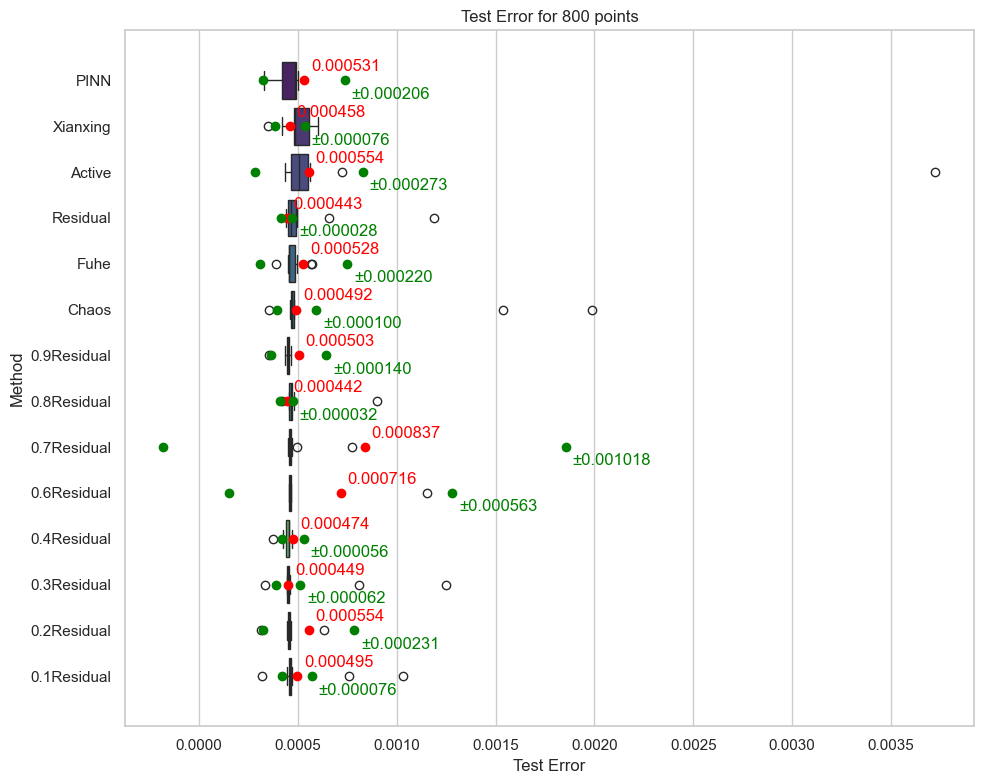

In [11]:
# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 过滤出 MAE 数据
mae_df = df[df['Metric'] == 'Error_u']

# 计算每个方法的均值和方差
mean_std_df = mae_df.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建一个图像
fig, ax = plt.subplots(figsize=(10, 8))

# 使用 Seaborn 的调色板
palette = sns.color_palette("viridis", len(mean_std_df))

# 绘制每个种子的 MAE 值的箱线图
sns.boxplot(y='Method', x='Values', data=mae_df, ax=ax, palette=palette)
ax.set_title('Test Error for 800 points')
ax.set_ylabel('Method')
ax.set_xlabel('Test Error')

# 在箱线图上标出均值和方差的数值
for index, row in mean_std_df.iterrows():
    # 绘制均值为红点
    ax.scatter(row['mean'], index, color='red', zorder=5)
    # 绘制方差为蓝点
    ax.scatter(row['mean'] + row['std'], index, color='green', zorder=5)
    ax.scatter(row['mean'] - row['std'], index, color='green', zorder=5)
    # 标注均值和方差
    ax.annotate(f'{row["mean"]:.6f}', 
                xy=(row['mean'], index), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.6f}', 
                xy=(row['mean'] + row['std'], index), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 自动调整子图参数，使得子图之间的间距适当
plt.tight_layout()
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_10528\3206839751.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Method', x='Values', data=mae_df, ax=ax, palette=palette)


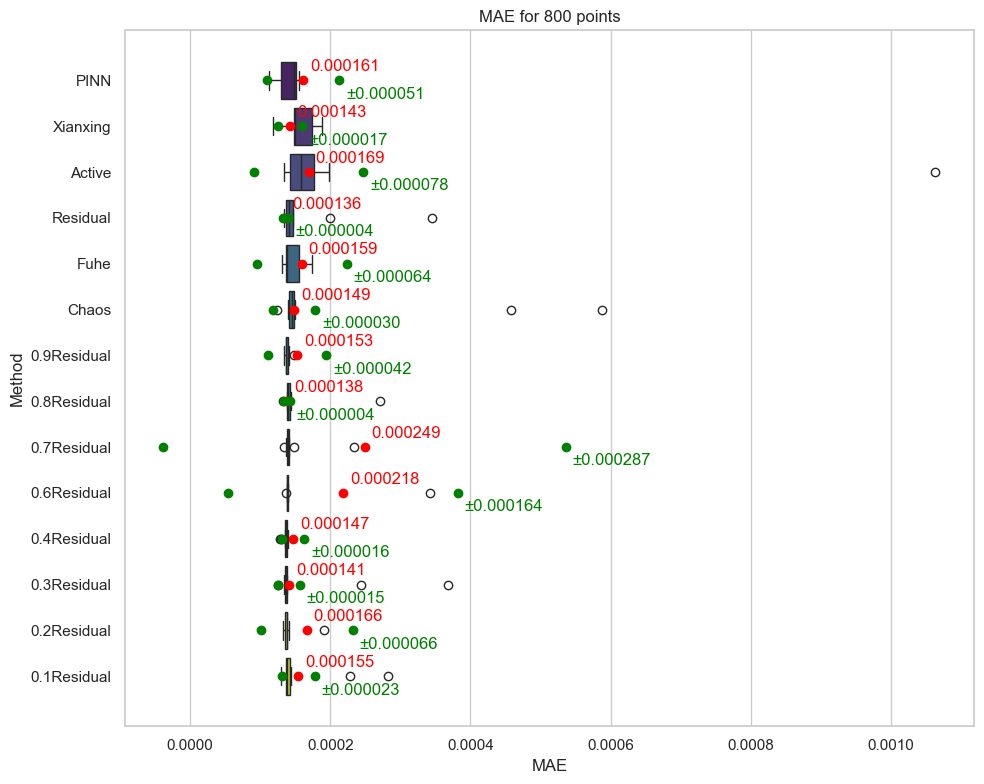

In [13]:
# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 过滤出 MAE 数据
mae_df = df[df['Metric'] == 'MAE']

# 计算每个方法的均值和方差
mean_std_df = mae_df.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建一个图像
fig, ax = plt.subplots(figsize=(10, 8))

# 使用 Seaborn 的调色板
palette = sns.color_palette("viridis", len(mean_std_df))

# 绘制每个种子的 MAE 值的箱线图
sns.boxplot(y='Method', x='Values', data=mae_df, ax=ax, palette=palette)
ax.set_title('MAE for 800 points')
ax.set_ylabel('Method')
ax.set_xlabel('MAE')

# 在箱线图上标出均值和方差的数值
for index, row in mean_std_df.iterrows():
    # 绘制均值为红点
    ax.scatter(row['mean'], index, color='red', zorder=5)
    # 绘制方差为蓝点
    ax.scatter(row['mean'] + row['std'], index, color='green', zorder=5)
    ax.scatter(row['mean'] - row['std'], index, color='green', zorder=5)
    # 标注均值和方差
    ax.annotate(f'{row["mean"]:.6f}', 
                xy=(row['mean'], index), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.6f}', 
                xy=(row['mean'] + row['std'], index), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 自动调整子图参数，使得子图之间的间距适当
plt.tight_layout()
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_10528\1069069178.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Method', x='Values', data=mae_df, ax=ax, palette=palette)


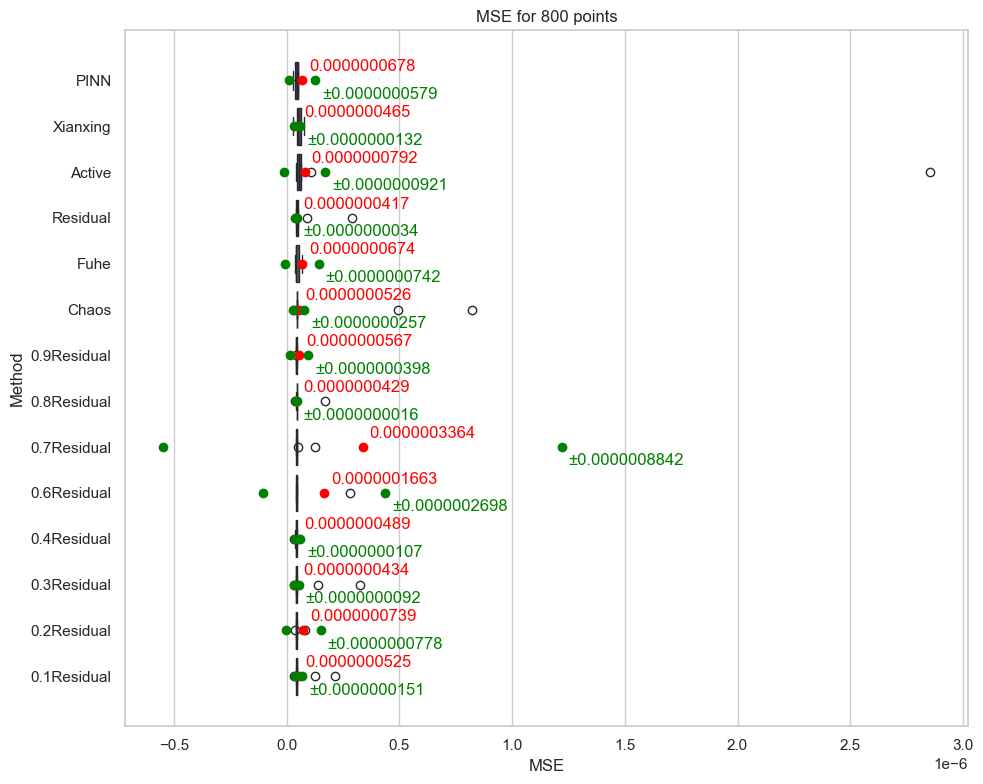

In [15]:
# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 过滤出 MAE 数据
mae_df = df[df['Metric'] == 'MSE']

# 计算每个方法的均值和方差
mean_std_df = mae_df.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建一个图像
fig, ax = plt.subplots(figsize=(10, 8))

# 使用 Seaborn 的调色板
palette = sns.color_palette("viridis", len(mean_std_df))

# 绘制每个种子的 MAE 值的箱线图
sns.boxplot(y='Method', x='Values', data=mae_df, ax=ax, palette=palette)
ax.set_title('MSE for 800 points')
ax.set_ylabel('Method')
ax.set_xlabel('MSE')

# 在箱线图上标出均值和方差的数值
for index, row in mean_std_df.iterrows():
    # 绘制均值为红点
    ax.scatter(row['mean'], index, color='red', zorder=5)
    # 绘制方差为蓝点
    ax.scatter(row['mean'] + row['std'], index, color='green', zorder=5)
    ax.scatter(row['mean'] - row['std'], index, color='green', zorder=5)
    # 标注均值和方差
    ax.annotate(f'{row["mean"]:.10f}', 
                xy=(row['mean'], index), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.10f}', 
                xy=(row['mean'] + row['std'], index), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 自动调整子图参数，使得子图之间的间距适当
plt.tight_layout()
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_10528\3794043380.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Method', x='Values', data=mae_df, ax=ax, palette=palette)


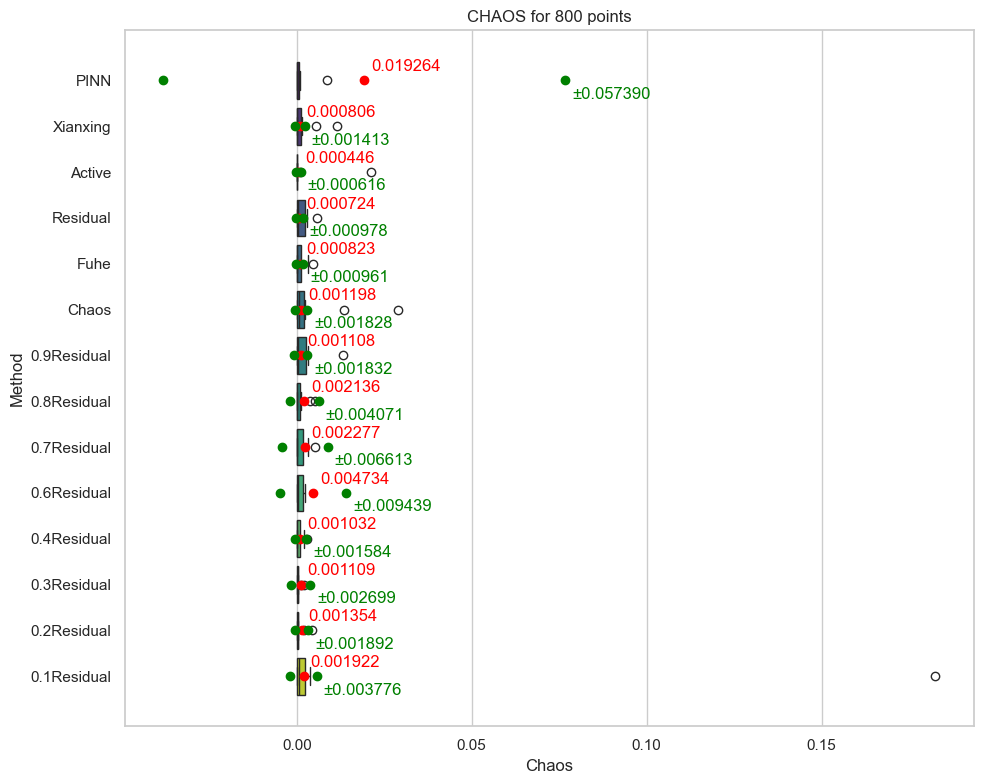

In [16]:
# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 过滤出 MAE 数据
mae_df = df[df['Metric'] == 'Chaos']

# 计算每个方法的均值和方差
mean_std_df = mae_df.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建一个图像
fig, ax = plt.subplots(figsize=(10, 8))

# 使用 Seaborn 的调色板
palette = sns.color_palette("viridis", len(mean_std_df))

# 绘制每个种子的 MAE 值的箱线图
sns.boxplot(y='Method', x='Values', data=mae_df, ax=ax, palette=palette)
ax.set_title('CHAOS for 800 points')
ax.set_ylabel('Method')
ax.set_xlabel('Chaos')

# 在箱线图上标出均值和方差的数值
for index, row in mean_std_df.iterrows():
    # 绘制均值为红点
    ax.scatter(row['mean'], index, color='red', zorder=5)
    # 绘制方差为蓝点
    ax.scatter(row['mean'] + row['std'], index, color='green', zorder=5)
    ax.scatter(row['mean'] - row['std'], index, color='green', zorder=5)
    # 标注均值和方差
    ax.annotate(f'{row["mean"]:.6f}', 
                xy=(row['mean'], index), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.6f}', 
                xy=(row['mean'] + row['std'], index), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 自动调整子图参数，使得子图之间的间距适当
plt.tight_layout()
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_10528\404329340.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Method', x='Values', data=mae_df, ax=ax, palette=palette)


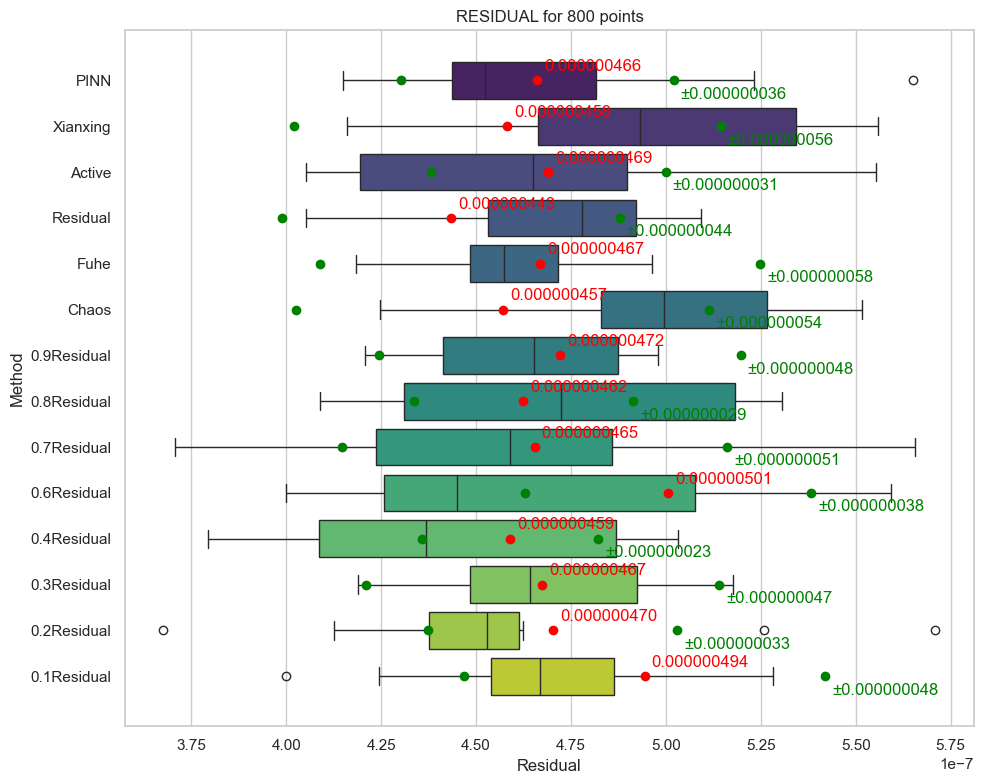

In [17]:
# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 过滤出 MAE 数据
mae_df = df[df['Metric'] == 'Residual']

# 计算每个方法的均值和方差
mean_std_df = mae_df.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建一个图像
fig, ax = plt.subplots(figsize=(10, 8))

# 使用 Seaborn 的调色板
palette = sns.color_palette("viridis", len(mean_std_df))

# 绘制每个种子的 MAE 值的箱线图
sns.boxplot(y='Method', x='Values', data=mae_df, ax=ax, palette=palette)
ax.set_title('RESIDUAL for 800 points')
ax.set_ylabel('Method')
ax.set_xlabel('Residual')

# 在箱线图上标出均值和方差的数值
for index, row in mean_std_df.iterrows():
    # 绘制均值为红点
    ax.scatter(row['mean'], index, color='red', zorder=5)
    # 绘制方差为蓝点
    ax.scatter(row['mean'] + row['std'], index, color='green', zorder=5)
    ax.scatter(row['mean'] - row['std'], index, color='green', zorder=5)
    # 标注均值和方差
    ax.annotate(f'{row["mean"]:.9f}', 
                xy=(row['mean'], index), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.9f}', 
                xy=(row['mean'] + row['std'], index), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 自动调整子图参数，使得子图之间的间距适当
plt.tight_layout()
plt.show()